# Carga de datos


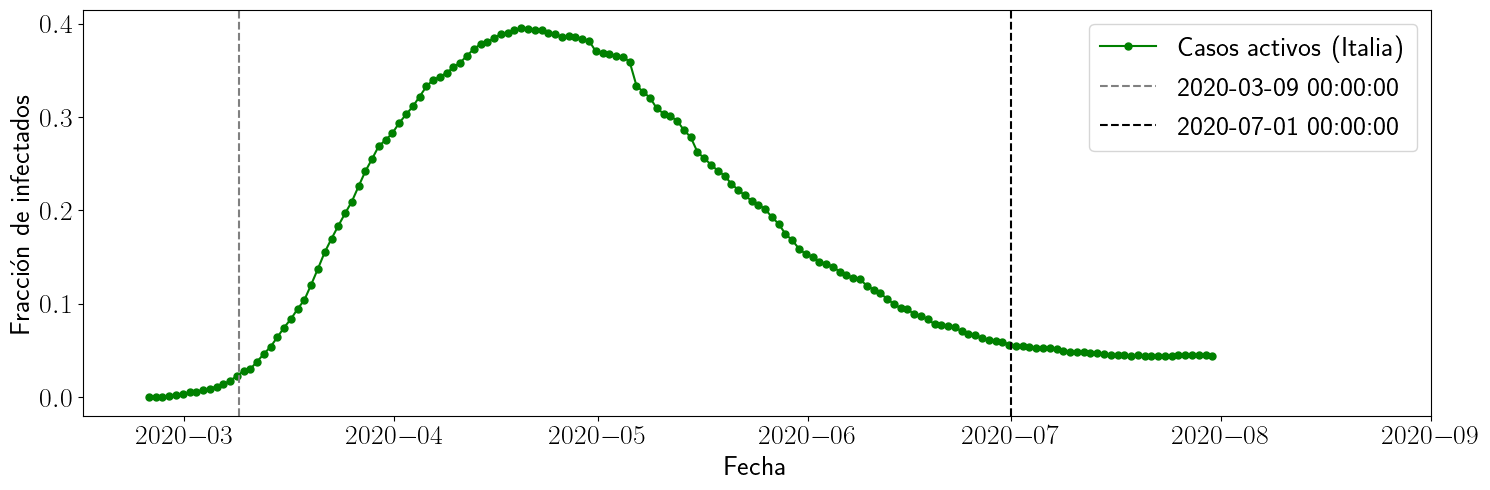

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('legend', fontsize=20)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)


# Cargar el archivo CSV
df_italy = pd.read_csv("data/italy/dpc-covid19-ita-andamento-nazionale.csv")

# Convertir la columna de fechas a tipo datetime
df_italy['data'] = pd.to_datetime(df_italy['data'])

col = df_italy['totale_positivi']
min_val = col.min()
max_val = col.max()

df_italy['positivi_norm'] = 10*(col - min_val) / (max_val - min_val)


# Filtrar el rango de fechas deseado
inicio = pd.to_datetime("2020-02-01")
fin = pd.to_datetime("2020-07-31")
df_italy_filtrado = df_italy[(df_italy['data'] >= inicio) & (df_italy['data'] <= fin)]


start_lockdown_italy = pd.to_datetime('2020-03-09')
end_lockdown_italy = pd.to_datetime('2020-07-01')

# Graficar la columna 'totale_positivi' en el rango filtrado
plt.figure(figsize=(15,5))
plt.plot(df_italy_filtrado['data'], df_italy_filtrado['positivi_norm'], 'o-', label='Casos activos (Italia)', color='green', markersize = 5)
plt.xlabel("Fecha", fontsize = 20)
plt.ylabel("Fracción de infectados", fontsize = 20)
plt.xlim([pd.to_datetime('2020-02-15'),pd.to_datetime('2020-09-01')])
plt.axvline(start_lockdown_italy, color='gray', linestyle='--', label=str(start_lockdown_italy))
plt.axvline(end_lockdown_italy, color='black', linestyle='--', label=str(end_lockdown_italy))
plt.legend()
plt.tight_layout()
plt.savefig('figures/Infected_italy.png')
plt.show()


In [61]:
import os

# Ruta de los archivos diarios
data_dir = "data/spain/daily_reports"

# Lista para guardar resultados
fechas_spain = []
fechas_colombia = []
casos_activos_spain = []
casos_activos_colombia = []

# Leer archivos ordenados por fecha
for archivo in sorted(os.listdir(data_dir)):
    if archivo.endswith(".csv"):
        try:
            # Extraer fecha del nombre del archivo
            fecha = pd.to_datetime(archivo.replace(".csv", ""), format="%m-%d-%Y")
            df = pd.read_csv(os.path.join(data_dir, archivo))

            # Establecer el nombre correcto de la columna de país
            if 'Country_Region' in df.columns:
                col_country = 'Country_Region'
            elif 'Country/Region' in df.columns:
                col_country = 'Country/Region'
            else:
                continue  # Saltar si no se encuentra ninguna variante

            # Filtrar registros de España
            df_spain = df[df[col_country] == 'Spain']

            # Filtrar registros de España
            df_colombia = df[df[col_country] == 'Colombia']

            
            # Sumar los casos activos Spain
            if 'Active' in df_spain.columns:
                #total_activos = df_spain['Active'].sum()
                total_activos = (df_spain['Confirmed'] - df_spain['Deaths'] - df_spain['Recovered']).sum()
            else:
                # Si no existe la columna 'Active', calcularla si están Confirmed, Deaths, Recovered
                if all(col in df_spain.columns for col in ['Confirmed', 'Deaths', 'Recovered']):
                    total_activos = (df_spain['Confirmed'] - df_spain['Deaths'] - df_spain['Recovered']).sum()
                else:
                    continue  # Saltar si no se puede calcular

            # Guardar
            fechas_spain.append(fecha)
            casos_activos_spain.append(total_activos)
            
                        
            # Sumar los casos activos Spain
            if 'Active' in df_colombia.columns:
                #total_activos = df_colombia['Active'].sum()
                total_activos = (df_colombia['Confirmed'] - df_colombia['Deaths'] - df_colombia['Recovered']).sum()
            else:
                # Si no existe la columna 'Active', calcularla si están Confirmed, Deaths, Recovered
                if all(col in df_colombia.columns for col in ['Confirmed', 'Deaths', 'Recovered']):
                    total_activos = (df_colombia['Confirmed'] - df_colombia['Deaths'] - df_colombia['Recovered']).sum()
                else:
                    continue  # Saltar si no se puede calcular

            # Guardar
            fechas_colombia.append(fecha)
            casos_activos_colombia.append(total_activos)

        except Exception as e:
            print(f"Error procesando {archivo}: {e}")


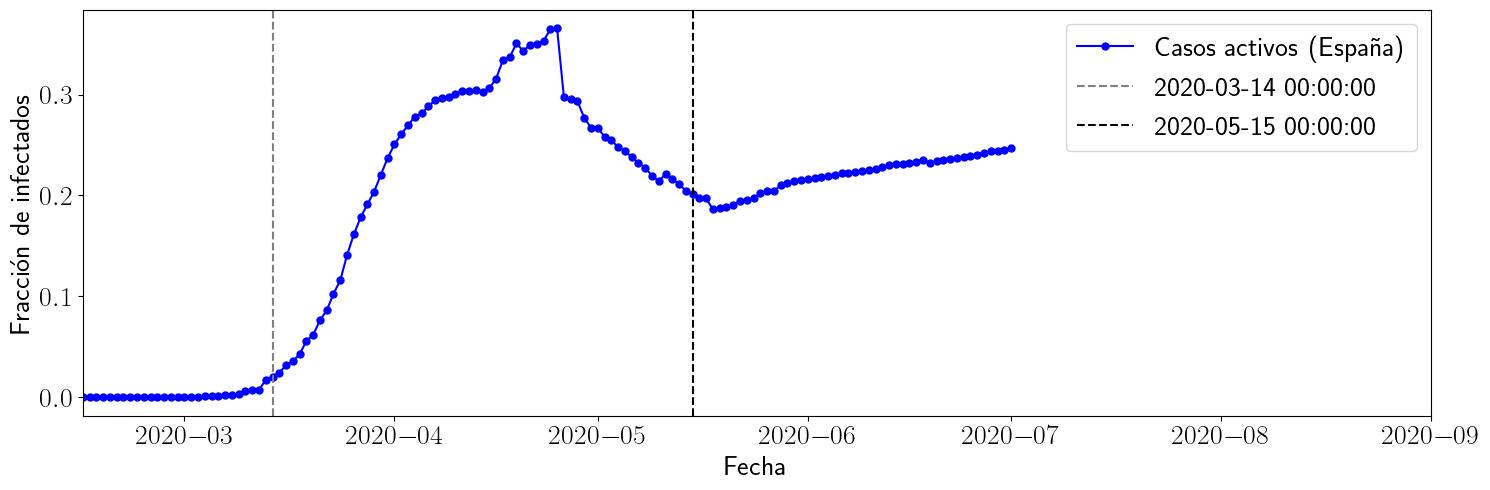

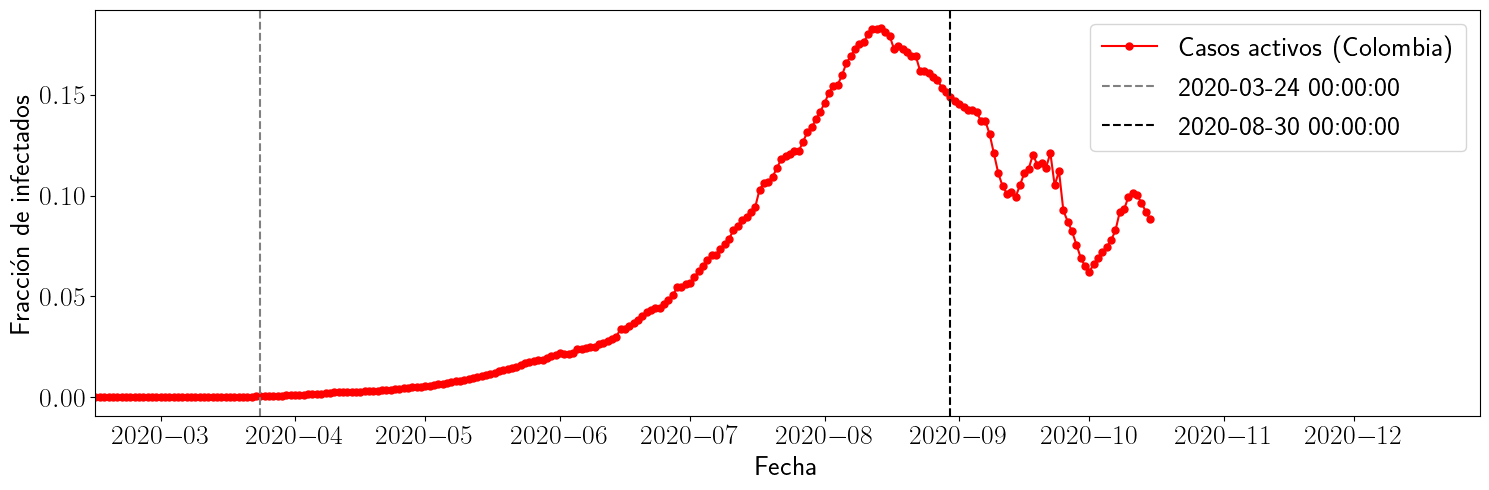

In [62]:

# Crear DataFrame
df_spain_activos = pd.DataFrame({
    'fecha': fechas_spain,
    'activos': casos_activos_spain
}).sort_values('fecha')


col = df_spain_activos['activos']
min_val = col.min()
max_val = col.max()

df_spain_activos['positivi_norm'] = 15*(col - min_val) / (max_val - min_val)

# Filtrar el rango de fechas deseado
inicio = pd.to_datetime("2020-02-15")
fin = pd.to_datetime("2020-07-01")
# Filtrar el DataFrame
df_spain_filtrado = df_spain_activos[(df_spain_activos['fecha'] >= inicio) & (df_spain_activos['fecha'] <= fin)]


start_lockdown_spain = pd.to_datetime('2020-03-14')
end_lockdown_spain = pd.to_datetime('2020-05-15')

# Graficar
plt.figure(figsize=(15,5))
plt.plot(df_spain_filtrado['fecha'], df_spain_filtrado['positivi_norm'], 'o-', label='Casos activos (España)', color='blue', markersize = 5)
plt.xlabel("Fecha", fontsize = 20)
plt.ylabel("Fracción de infectados", fontsize = 20)
plt.xlim([pd.to_datetime('2020-02-15'),pd.to_datetime('2020-09-01')])
plt.axvline(start_lockdown_spain, color='gray', linestyle='--', label=str(start_lockdown_spain))
plt.axvline(end_lockdown_spain, color='black', linestyle='--', label=str(end_lockdown_spain))
plt.legend()
plt.tight_layout()
plt.savefig('figures/Infected_spain.png')
plt.show()




# Crear DataFrame
df_colombia_activos = pd.DataFrame({
    'fecha': fechas_colombia,
    'activos': casos_activos_colombia
}).sort_values('fecha')


col = df_colombia_activos['activos']
min_val = col.min()
max_val = col.max()

df_colombia_activos['positivi_norm'] = (col - min_val) / (max_val - min_val)

# Filtrar el rango de fechas deseado
inicio = pd.to_datetime("2020-02-01")
fin = pd.to_datetime("2020-10-15")
# Filtrar el DataFrame
df_colombia_filtrado = df_colombia_activos[(df_colombia_activos['fecha'] >= inicio) & (df_colombia_activos['fecha'] <= fin)]



start_lockdown_colombia = pd.to_datetime('2020-03-24')
end_lockdown_colombia = pd.to_datetime('2020-08-30')

# Graficar
plt.figure(figsize=(15,5))
plt.plot(df_colombia_filtrado['fecha'], df_colombia_filtrado['positivi_norm'], 'o-', label='Casos activos (Colombia)', color='red', markersize = 5)
plt.xlabel("Fecha", fontsize = 20)
plt.ylabel("Fracción de infectados", fontsize = 20)
plt.xlim([pd.to_datetime('2020-02-15'),pd.to_datetime('2020-12-30')])
plt.axvline(start_lockdown_colombia, color='gray', linestyle='--', label=str(start_lockdown_colombia))
plt.axvline(end_lockdown_colombia, color='black', linestyle='--', label=str(end_lockdown_colombia))
plt.legend()
plt.tight_layout()
plt.savefig('figures/Infected_colombia.png')
plt.show()




# Modelo SIR Simple - Ajuste $\beta$ y $\gamma$

In [63]:
import numpy as np
from scipy.optimize import minimize

# ========================================
# 1. Modelo SIR con integración explícita RK4
# ========================================
def rk4_sir(S0, I0, R0, beta, gamma, t_eval):
    N = S0 + I0 + R0
    dt = t_eval[1] - t_eval[0]
    S, I, R = [S0], [I0], [R0]

    for t in t_eval[:-1]:
        s, i, r = S[-1], I[-1], R[-1]

        def deriv(s, i, r):
            dsdt = -beta * s * i / N
            didt = beta * s * i / N - gamma * i
            drdt = gamma * i
            return dsdt, didt, drdt

        # RK4
        k1 = deriv(s, i, r)
        k2 = deriv(s + dt * k1[0]/2, i + dt * k1[1]/2, r + dt * k1[2]/2)
        k3 = deriv(s + dt * k2[0]/2, i + dt * k2[1]/2, r + dt * k2[2]/2)
        k4 = deriv(s + dt * k3[0], i + dt * k3[1], r + dt * k3[2])

        s_new = s + dt/6 * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        i_new = i + dt/6 * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
        r_new = r + dt/6 * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2])

        S.append(s_new)
        I.append(i_new)
        R.append(r_new)

    return np.array(S), np.array(I), np.array(R)


# ========================================
# 2. Función de costo: error cuadrático entre I_modelo e I_datos
# ========================================
def loss_sir(params, I_data, S0, I0, R0, t_eval):
    beta, gamma = params
    _, I_pred, _ = rk4_sir(S0, I0, R0, beta, gamma, t_eval)
    return np.mean((I_data - I_pred)**2)


# ========================================
# 3. Función general de ajuste
# ========================================
def ajustar_parametros_sir(fecha, infectados, fecha_inicio, fecha_fin, poblacion_total):
    # Filtrar datos en rango deseado
    mask = (fecha >= fecha_inicio) & (fecha <= fecha_fin)
    fechas_rango = fecha[mask].reset_index(drop=True)
    I_data = infectados[mask].astype(float).reset_index(drop=True)

    # Condiciones iniciales
    I0 = I_data[0]
    R0 = 0
    S0 = poblacion_total - I0

    # Vector de tiempo (asumiendo pasos diarios)
    t_eval = np.arange(len(I_data))

    # Restricciones de beta y gamma
    bounds = [(1e-5, 0.6), (1e-5, 0.06)]
    guess = [0.1, 0.01]

    result = minimize(loss_sir, guess,
                      args=(I_data, S0, I0, R0, t_eval), bounds = bounds)

    beta_opt, gamma_opt = result.x
    return beta_opt, gamma_opt, I_data, t_eval, result

def graficar_ajuste_sir(fechas, infectados, fecha_inicio, fecha_fin, poblacion_total,
                        beta_opt, gamma_opt, label_pais='País'):

    rc('font', **{'serif': ['Computer Modern']})
    rc('text', usetex=True)
    rc('legend', fontsize=15)
    rc('xtick', labelsize=15)
    rc('ytick', labelsize=15)
    # Filtrar los datos reales
    mask = (fechas >= fecha_inicio) & (fechas <= fecha_fin)
    fechas_plot = fechas[mask].reset_index(drop=True)
    I_data = infectados[mask].astype(float).reset_index(drop=True)

    # Condiciones iniciales
    I0 = I_data[0]
    R0 = 0
    S0 = poblacion_total - I0

    # Vector de tiempo
    t_eval = np.arange(len(I_data))

    # Resolver el modelo SIR
    _, I_model, _ = rk4_sir(S0, I0, R0, beta_opt, gamma_opt, t_eval)

    # Graficar
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(fechas_plot, I_data, 'o', label='Datos reales ('+label_pais+')', color='salmon')
    ax.plot(fechas_plot, I_model, '-', label=r'Modelo SIR ajustado', color='royalblue')
    ax.set_xlabel("Fecha", fontsize=20)
    ax.set_ylabel("Fracción de infectados",fontsize=20)
    ax.tick_params(axis='x', labelrotation=45)
    # Añadir texto en coordenadas relativas del eje (porcentaje del ancho y alto)
    ax.text(0.1, 0.6, r'$\beta$ = ' + f'{beta_opt:.4f}', transform=ax.transAxes, fontsize=20)
    ax.text(0.1, 0.5, r'$\gamma$ = ' + f'{gamma_opt:.4f}', transform=ax.transAxes, fontsize=20)

    ax.legend()
    plt.savefig('figures/Ajuste_SIR_'+label_pais+'.png', bbox_inches='tight')
    plt.show()


β = 0.2617, γ = 0.0000


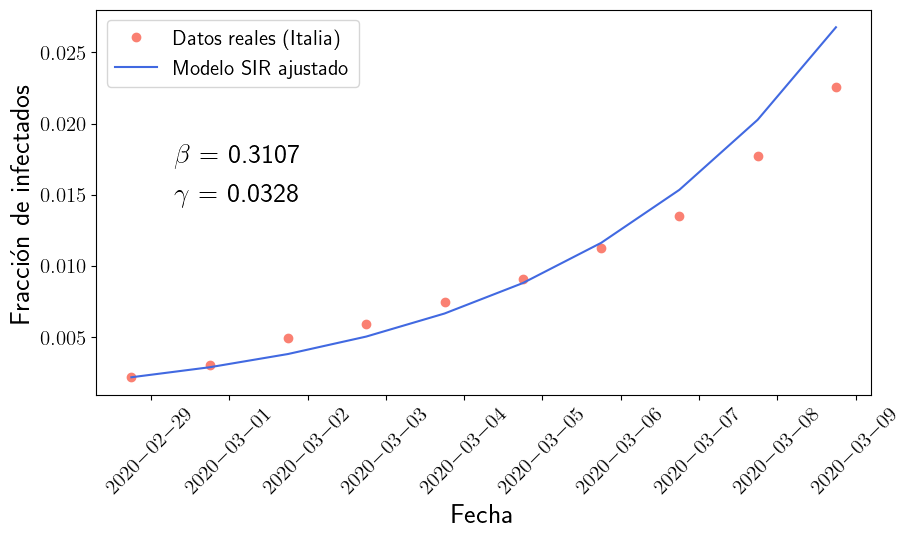

In [64]:
# Supón que tienes estos datos para Italia
from datetime import datetime



# Ejemplo: usando df_italia que tiene columnas 'fecha' y 'activos'
beta_it, gamma_it, I_data_it, t_it, _ = ajustar_parametros_sir(
    fecha=df_italy['data'],
    infectados=df_italy['positivi_norm'],
    fecha_inicio=datetime(2020, 2, 28),
    fecha_fin=datetime(2020, 3, 9),
    poblacion_total=60000000  # Italia
)

print(f"β = {beta_it:.4f}, γ = {gamma_it:.4f}")



graficar_ajuste_sir(
    fechas=df_italy['data'],
    infectados=df_italy['positivi_norm'],
    fecha_inicio=datetime(2020, 2, 28),
    fecha_fin=datetime(2020, 3, 9),
    poblacion_total=60_000_000,
    beta_opt=0.3107,
    gamma_opt=0.0328,
    label_pais='Italia'
)


β = 0.3216, γ = 0.0000


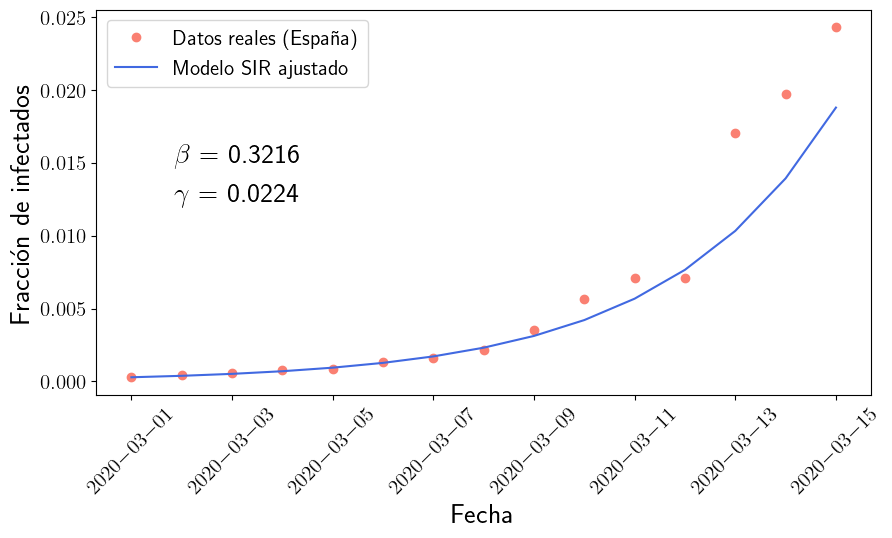

In [65]:
from datetime import datetime


# Ajuste de parámetros
beta_es, gamma_es, I_data_es, t_es, _ = ajustar_parametros_sir(
    fecha=df_spain_activos['fecha'],
    infectados=df_spain_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 3, 1),
    fecha_fin=datetime(2020, 3, 15),
    poblacion_total=47_000_000
)

print(f"β = {beta_es:.4f}, γ = {gamma_es:.4f}")
# Gráfica
graficar_ajuste_sir(
    fechas=df_spain_activos['fecha'],
    infectados=df_spain_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 3, 1),
    fecha_fin=datetime(2020, 3, 15),
    poblacion_total=47_000_000,
    beta_opt=beta_es,
    gamma_opt=0.0224,
    label_pais='España'
)



β = 0.0614, γ = 0.0293


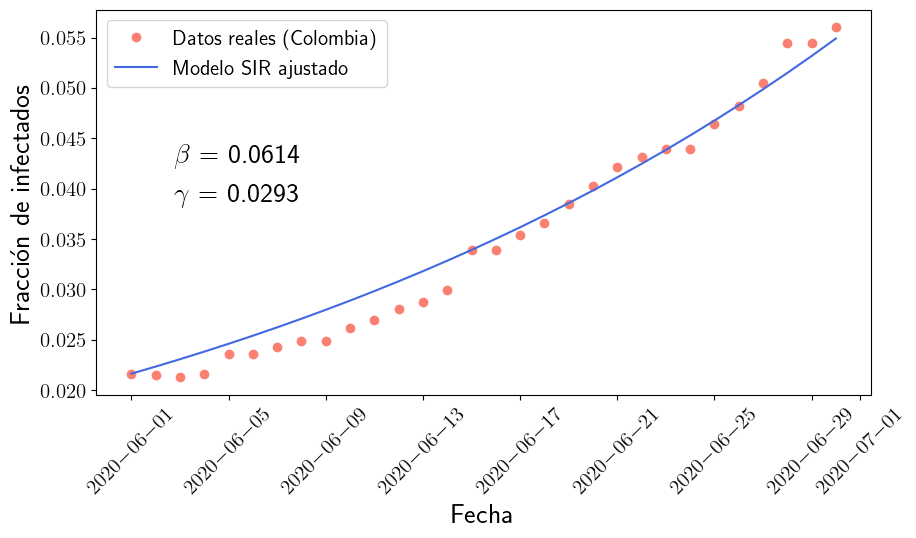

In [66]:
from datetime import datetime


# Ajuste de parámetros
beta_col, gamma_col, I_data_col, t_col, _ = ajustar_parametros_sir(
    fecha=df_colombia_activos['fecha'],
    infectados=df_colombia_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 6, 1),
    fecha_fin=datetime(2020, 6, 30),
    poblacion_total=50_000_000
)

print(f"β = {beta_col:.4f}, γ = {gamma_col:.4f}")
# Gráfica
graficar_ajuste_sir(
    fechas=df_colombia_activos['fecha'],
    infectados=df_colombia_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 6, 1),
    fecha_fin=datetime(2020, 6, 30),
    poblacion_total=50_000_000,
    beta_opt=beta_col,
    gamma_opt=gamma_col,
    label_pais='Colombia'
)



# Modelo SIR Extendido

In [67]:
import numpy as np
from scipy.interpolate import interp1d

def resolver_modelo_sir_social(fechas, infectados, fecha_inicio, fecha_fin, poblacion_total,
                               beta, gamma, delta_t=1.0):
    """
    Resuelve el modelo SIR extendido con función H adaptada para la etapa post-lockdown.

    Parámetros:
    - fechas: Serie de fechas completas (formato datetime)
    - infectados: Serie con valores de infectados diarios (activos)
    - fecha_inicio, fecha_fin: Rango de fechas a analizar (fase post-lockdown)
    - poblacion_total: N
    - beta, gamma: parámetros del modelo SIR ajustados antes del confinamiento
    - delta_t: tamaño del paso de integración (ej. 1.0 para días)

    Retorna:
    - t_eval: pasos de tiempo en días
    - S, I, R: soluciones del modelo SIR extendido
    - H: valores de la función de control social H(t)
    - fechas_rango: fechas correspondientes a los pasos en t_eval
    - I_data_interp: datos reales de infectados interpolados en la malla
    """
    # Paso 1: calcular duración en días
    dias = (fecha_fin - fecha_inicio).days
    Nt = int(dias / delta_t) + 1
    t_eval = np.linspace(0, dias, Nt)

    # Paso 2: filtrar los datos reales en el intervalo deseado
    mask = (fechas >= fecha_inicio) & (fechas <= fecha_fin)
    fechas_reales = fechas[mask].reset_index(drop=True)
    I_reales = infectados[mask].astype(float).reset_index(drop=True)

    # Paso 3: convertir fechas reales a días desde fecha_inicio
    dias_reales = (fechas_reales - fecha_inicio).dt.days.to_numpy()

    # Paso 4: interpolar los datos reales a la malla temporal
    interp_I = interp1d(dias_reales, I_reales, kind='linear', bounds_error=False, fill_value="extrapolate")
    I_data_interp = interp_I(t_eval)

    # Paso 5: condiciones iniciales (en escala absoluta)
    I = [I_data_interp[0]]
    S = [poblacion_total - I_data_interp[0]]
    R = [0.0]
    H = []

    # Paso 6: resolver el modelo paso a paso
    for n in range(Nt - 1):
        In = I[-1]
        Sn = S[-1]
        Rn = R[-1]

        # Estimar H_n usando fórmula del artículo (3.12)
        numerador = I_data_interp[n] - In + gamma * In * delta_t
        denominador = beta * In * Sn * delta_t

        if denominador <= 1e-8:
            Hn = 0.0
        else:
            Hn = np.clip(numerador / denominador, 0.0, 1.0)

        H.append(Hn)

        # Actualizar valores del modelo
        Sn1 = Sn - delta_t * beta * In * Sn * Hn
        In1 = In + delta_t * (beta * In * Sn * Hn - gamma * In)
        Rn1 = Rn + delta_t * gamma * In

        S.append(Sn1)
        I.append(In1)
        R.append(Rn1)

    # Último H
    H.append(H[-1] if H else 0.0)

    from datetime import timedelta
    fechas_rango = [fecha_inicio + timedelta(days=float(t)) for t in t_eval]


    return t_eval, np.array(S), np.array(I), np.array(R), np.array(H), fechas_rango


import matplotlib.pyplot as plt

def graficar_modelo_sir_social_vs_datos(fechas_post, I_model, fechas_originales, infectados_original,
                                        fecha_inicio, fecha_fin, label_pais='País'):
    """
    Graficar modelo SIR social vs datos reales en el mismo intervalo de fechas.
    - fechas_post: fechas del modelo extendido
    - I_model: valores simulados del modelo
    - fechas_originales: serie de fechas del DataFrame original
    - infectados_original: serie de infectados (ej. df['totale_positivi'])
    - fecha_inicio, fecha_fin: intervalo a mostrar
    """
    # Filtrar datos reales en el rango correcto
    mask = (fechas_originales >= fecha_inicio) & (fechas_originales <= fecha_fin)
    fechas_datos = fechas_originales[mask].reset_index(drop=True)
    I_data = infectados_original[mask].reset_index(drop=True)


    # Graficar
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(fechas_datos, I_data, 'o', label='Datos reales ('+label_pais+')', color='salmon', markersize = 5)
    ax.plot(fechas_post, I_model, '--', label='Modelo SIR extendido', color='black', linewidth = 3)
    ax.set_xlabel("Fecha", fontsize=20)
    ax.set_ylabel("Fracción de infectados",fontsize=20)
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend()
    plt.savefig('figures/SIR_extendido_'+label_pais+'.png', bbox_inches='tight')
    plt.show()
    
def graficar_Hn(fechas_post, H, label_pais='País'):
    """
    Grafica la evolución de la función H_n (medidas sociales) en el tiempo.
    """
    plt.figure(figsize=(10,4))
    plt.plot(fechas_post, H, '-', color='green')
    plt.xlabel("Fecha")
    plt.ylabel("Hₙ (control social)")
    plt.title(f"{label_pais}: Evolución de Hₙ estimada en etapa post-lockdown")
    plt.grid(True)
    plt.tight_layout()
    plt.ylim(-0.05, 1.05)
    plt.show()



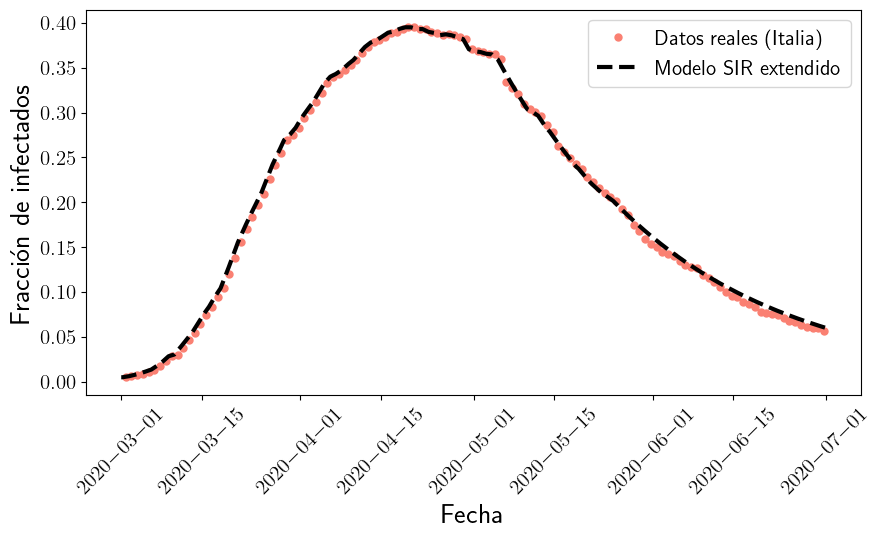

"\ngraficar_Hn(\n    fechas_post=fechas_post,\n    H=H_post,\n    label_pais='Italia'\n)\n"

In [68]:
t_post, S_post, I_post, R_post, H_post, fechas_post = resolver_modelo_sir_social(
    fechas=df_italy['data'],
    infectados=df_italy['positivi_norm'],
    fecha_inicio=datetime(2020, 3, 1),
    fecha_fin=datetime(2020, 7, 1),
    poblacion_total=60_000_000,
    beta=0.3107,
    gamma=0.0328,
    delta_t=0.2
)

poblacion_total = 60_000_000
graficar_modelo_sir_social_vs_datos(
    fechas_post=fechas_post,
    I_model=I_post,
    fechas_originales=df_italy['data'],
    infectados_original=df_italy['positivi_norm'],
    fecha_inicio=datetime(2020, 3, 1),
    fecha_fin=datetime(2020, 7, 1),
    label_pais="Italia"
)

'''
graficar_Hn(
    fechas_post=fechas_post,
    H=H_post,
    label_pais='Italia'
)
'''


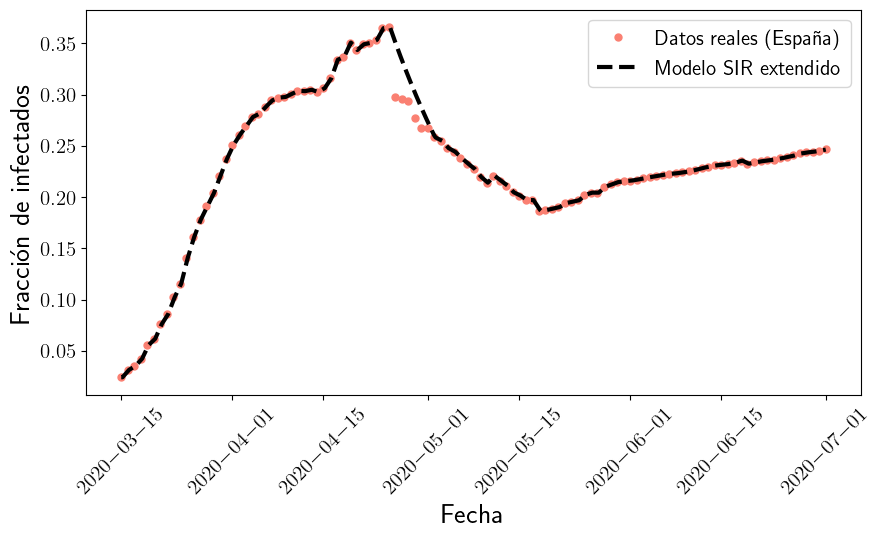

In [69]:
t_post, S_post, I_post, R_post, H_post, fechas_post = resolver_modelo_sir_social(
    fechas=df_spain_activos['fecha'],
    infectados=df_spain_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 3, 15),
    fecha_fin=datetime(2020, 7, 1),
    poblacion_total=47_000_000,
    beta=0.2340,
    gamma=0.05,
    delta_t=0.2
)

poblacion_total = 47_000_000
graficar_modelo_sir_social_vs_datos(
    fechas_post=fechas_post,
    I_model=I_post,
    fechas_originales=df_spain_activos['fecha'],
    infectados_original=df_spain_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 3, 15),
    fecha_fin=datetime(2020, 7, 1),
    label_pais="España"
)



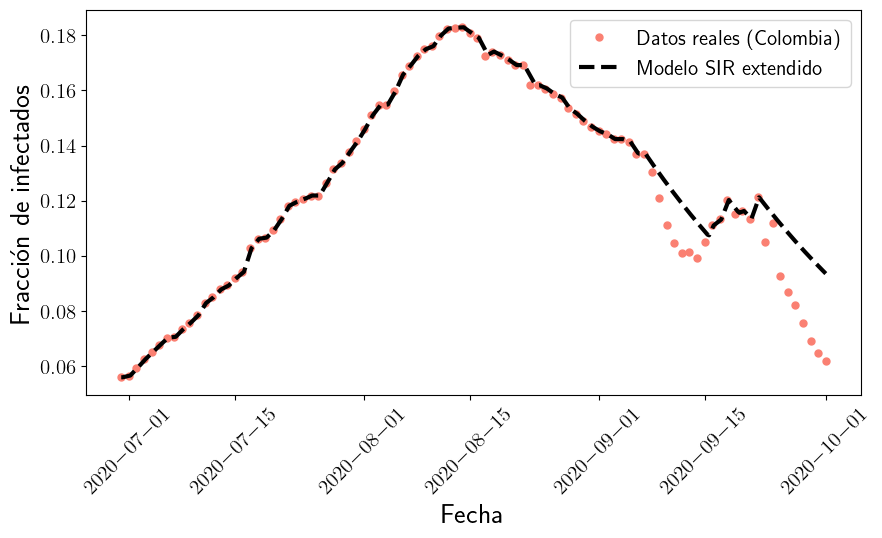

In [70]:
t_post, S_post, I_post, R_post, H_post, fechas_post = resolver_modelo_sir_social(
    fechas=df_colombia_activos['fecha'],
    infectados=df_colombia_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 6, 30),
    fecha_fin=datetime(2020, 10, 1),
    poblacion_total=50_000_000,
    beta=beta_col,
    gamma=gamma_col,
    delta_t=0.2
)

poblacion_total = 50_000_000
graficar_modelo_sir_social_vs_datos(
    fechas_post=fechas_post,
    I_model=I_post,
    fechas_originales=df_colombia_activos['fecha'],
    infectados_original=df_colombia_activos['positivi_norm'],
    fecha_inicio=datetime(2020, 6, 30),
    fecha_fin=datetime(2020, 10, 1),
    label_pais="Colombia"
)


# GUARDAR DATOS

In [71]:
def preparar_datos_nn_reales(df, col_fecha, col_infectados, poblacion, beta, gamma,
                              fecha_inicio, fecha_fin, delta_t=0.2):
    """
    Corre el modelo y devuelve los simulados + los datos reales originales (sin interpolar).
    """
    # Simular
    t, S, I_model, R, H, fechas_simuladas = resolver_modelo_sir_social(
        fechas=df[col_fecha],
        infectados=df[col_infectados],
        fecha_inicio=fecha_inicio,
        fecha_fin=fecha_fin,
        poblacion_total=poblacion,
        beta=beta,
        gamma=gamma,
        delta_t=delta_t
    )

    # Filtrar datos reales en ese intervalo exacto
    mask = (df[col_fecha] >= fecha_inicio) & (df[col_fecha] <= fecha_fin)
    fechas_reales = df[col_fecha][mask].reset_index(drop=True)
    valores_reales = df[col_infectados][mask].reset_index(drop=True)

    return {
        "fechas_modelo": fechas_simuladas,
        "simulados": I_model,
        "fechas_reales": fechas_reales,
        "reales": valores_reales
    }

def guardar_npz_datos_con_reales_originales(nombre_archivo, datos_dict):
    """
    Guarda los datos simulados + reales sin interpolación.
    """
    np.savez(
        nombre_archivo,
        fechas_modelo=np.array([f.strftime('%Y-%m-%d') for f in datos_dict["fechas_modelo"]]),
        simulados=datos_dict["simulados"],
        fechas_reales=np.array([f.strftime('%Y-%m-%d') for f in datos_dict["fechas_reales"]]),
        reales=datos_dict["reales"]
    )


In [59]:
# ----------- ITALIA -----------
datos_train_ita = preparar_datos_nn_reales(
    df=df_italy,
    col_fecha='data',
    col_infectados='positivi_norm',
    poblacion=60_000_000,
    beta=0.3107,
    gamma=0.0328,
    fecha_inicio=datetime(2020, 3, 1),
    fecha_fin=datetime(2020, 7, 1)
)

datos_test_ita = preparar_datos_nn_reales(
    df=df_italy,
    col_fecha='data',
    col_infectados='positivi_norm',
    poblacion=60_000_000,
    beta=0.3107,
    gamma=0.0328,
    fecha_inicio=datetime(2020, 7, 2),
    fecha_fin=datetime(2020, 7, 15)
)


guardar_npz_datos_con_reales_originales('sir_italy_train.npz', datos_train_ita)
guardar_npz_datos_con_reales_originales('sir_italy_test.npz', datos_test_ita)


# ----------- ESPAÑA -----------
datos_train_es = preparar_datos_nn_reales(
    df=df_spain_activos,
    col_fecha='fecha',
    col_infectados='positivi_norm',
    poblacion=47_000_000,
    beta=0.2340,
    gamma=0.05,
    fecha_inicio=datetime(2020, 3, 15),
    fecha_fin=datetime(2020, 7, 1)
)

datos_test_es = preparar_datos_nn_reales(
    df=df_spain_activos,
    col_fecha='fecha',
    col_infectados='positivi_norm',
    poblacion=47_000_000,
    beta=0.2340,
    gamma=0.05,
    fecha_inicio=datetime(2020, 7, 2),
    fecha_fin=datetime(2020, 7, 15)
)

guardar_npz_datos_con_reales_originales('sir_spain_train.npz', datos_train_es)
guardar_npz_datos_con_reales_originales('sir_spain_test.npz', datos_test_es)


# ----------- COLOMBIA -----------
datos_train_col = preparar_datos_nn_reales(
    df=df_colombia_activos,
    col_fecha='fecha',
    col_infectados='positivi_norm',
    poblacion=50_000_000,
    beta=beta_col,
    gamma=gamma_col,
    fecha_inicio=datetime(2020, 7, 1),
    fecha_fin=datetime(2020, 10, 1)
)

datos_test_col = preparar_datos_nn_reales(
    df=df_colombia_activos,
    col_fecha='fecha',
    col_infectados='positivi_norm',
    poblacion=50_000_000,
    beta=beta_col,
    gamma=gamma_col,
    fecha_inicio=datetime(2020, 10, 2),
    fecha_fin=datetime(2020, 10, 15)
)

guardar_npz_datos_con_reales_originales('sir_colombia_train.npz', datos_train_col)
guardar_npz_datos_con_reales_originales('sir_colombia_test.npz', datos_test_col)